In [1]:
import sys
sys.path.append('../')
import utils.general as utils

import utils.gt.io_utils as gtio

#datadir='~/mowgli-in-the-jungle/kb/'
#datadir='/nas/home/ilievski/mowgli-in-the-jungle/kb/'
datadir='/Users/filipilievski/mowgli-dev-framework/kb/'
mowgli_nodes=f'{datadir}nodes_v002.csv'
mowgli_edges=f'{datadir}edges_v002.csv'
output_gml=f'{datadir}graph.graphml'

In [2]:
#gtio.transform_to_graphtool_format(mowgli_nodes, mowgli_edges, output_gml, True)
g=gtio.load_gt_graph(output_gml.replace(".graphml", '.gt'))

/Users/filipilievski/opt/anaconda3/envs/mcs/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:1494: RuntimeWarning: Error importing Gtk module: No module named 'gi'; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)
2020-02-10 10:13:04.994 | INFO     | utils.gt.io_utils:load_gt_graph:13 - loading the generated graph file from /Users/filipilievski/mowgli-dev-framework/kb/graph.gt


In [3]:
import importlib

#### Basic stats

In [4]:
import utils.gt.analysis_utils as gtanalysis
%matplotlib inline

In [114]:
importlib.reload(gtanalysis)

<module 'utils.gt.analysis_utils' from '../utils/gt/analysis_utils.py'>

In [6]:
plottype='loglog'
base=10
xlabel='degree'
ylabel='# nodes'

In [7]:
num_nodes=gtanalysis.get_num_nodes(g)
num_edges=gtanalysis.get_num_edges(g)
avg_degree=gtanalysis.compute_avg_node_degree(g, 'total')

In [8]:
directions=['in', 'out', 'total']

In [ ]:
gtanalysis.get_topN_relations(g)

In [85]:
g.properties

{('v',
  '_graphml_vertex_id'): <VertexPropertyMap object with value type 'string', for Graph 0x7f9870938e90, at 0x7f9870423450>,
 ('v',
  'aliases'): <VertexPropertyMap object with value type 'string', for Graph 0x7f9870938e90, at 0x7f9870423350>,
 ('v',
  'datasource'): <VertexPropertyMap object with value type 'string', for Graph 0x7f9870938e90, at 0x7f98704238d0>,
 ('v',
  'label'): <VertexPropertyMap object with value type 'string', for Graph 0x7f9870938e90, at 0x7f9870423550>,
 ('v',
  'other'): <VertexPropertyMap object with value type 'string', for Graph 0x7f9870938e90, at 0x7f9870424310>,
 ('v',
  'pos'): <VertexPropertyMap object with value type 'string', for Graph 0x7f9870938e90, at 0x7f9870d4a390>,
 ('e',
  '_graphml_edge_id'): <EdgePropertyMap object with value type 'string', for Graph 0x7f9870938e90, at 0x7f9870daa310>,
 ('e',
  'datasource'): <EdgePropertyMap object with value type 'string', for Graph 0x7f9870938e90, at 0x7f9870daa2d0>,
 ('e',
  'other'): <EdgePropertyMa

In [46]:
degrees={}
for direction in directions:
    stats=gtanalysis.compute_stats(g, direction)
    print(stats)

    
    degree_data=gtanalysis.compute_node_degree_hist(g, direction)
    degrees[direction]=list(degree_data[0])

{'num_nodes': 15776296, 'num_edges': 35037637, 'avg_degree': 2.2209038800996126, 'degree_maxn_counts': [5586168, 6390596, 810587, 1942396, 253380, 254033, 104300, 77119, 41794, 41094], 'stdev_degree': 0.06608135202529582}
{'num_nodes': 15776296, 'num_edges': 35037637, 'avg_degree': 2.2209038800996126, 'degree_maxn_counts': [522277, 8255963, 2189557, 1864938, 2123869, 229867, 148843, 104141, 73830, 52907], 'stdev_degree': 0.0015965286635876293}
{'num_nodes': 15776296, 'num_edges': 35037637, 'avg_degree': 4.441807760199225, 'degree_maxn_counts': [468, 2303080, 4832724, 2600645, 4049396, 507209, 326961, 224855, 129287, 117570], 'stdev_degree': 0.06613670809880458}


#### Working with degrees

In [48]:
len_degrees=len(degrees['total'])
for d in directions:
    add_zeros=[0]*(len_degrees-len(degrees[d]))
    degrees[d] = degrees[d] + add_zeros
#    print(add_zeros)

In [60]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [62]:
degrees['x'] = list(np.arange(len(degrees['total'])))

In [66]:
df = pd.DataFrame(degrees)

In [67]:
df

,in,out,total,x
0,5586168,522277,468,0
1,6390596,8255963,2303080,1
2,810587,2189557,4832724,2
3,1942396,1864938,2600645,3
4,253380,2123869,4049396,4
...,...,...,...,...
587354,0,0,0,587354
587355,0,0,0,587355
587356,0,0,0,587356
587357,0,0,0,587357


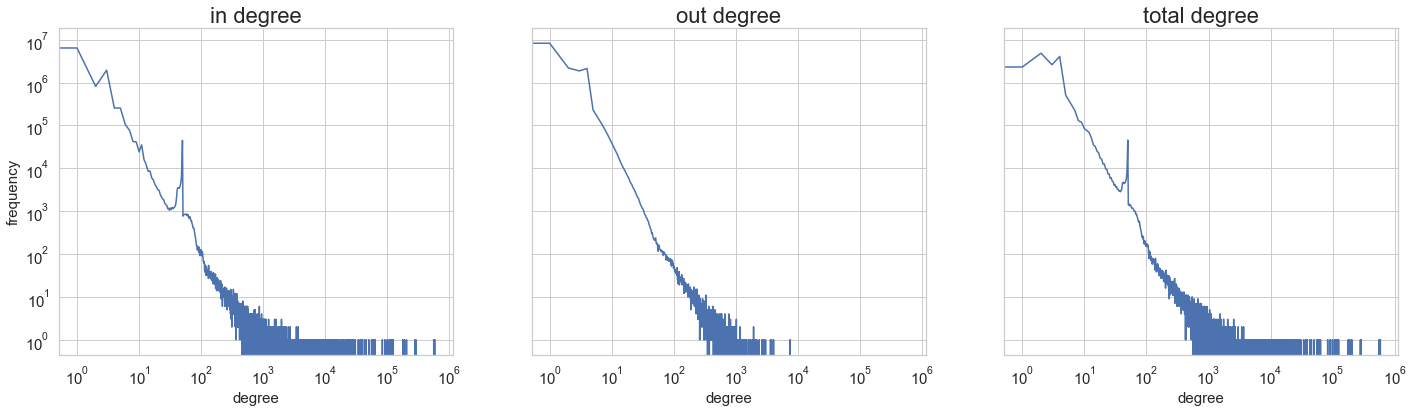

In [152]:
#sns.set_style("whitegrid")
sns.set(rc={"font.size":20,"axes.titlesize":22,"axes.labelsize":15, 'xtick.labelsize': 15, 'ytick.labelsize': 15}, style="whitegrid")

f, axes = plt.subplots(1,3, figsize=(24, 6), sharey=True)#, fontsize=20,fontweight='bold')
for i, d in enumerate(directions):
    p=sns.lineplot(data=df, x='x', y=d, ax=axes[i])
    p.set(xscale="log", yscale="log", title=d + ' degree', xlabel='degree', ylabel='frequency')

In [153]:
f.savefig('degrees.png')

In [ ]:
gtanalysis.plot_degrees(degrees, 
                        plottype=plottype, 
                        base=base, 
                        xlabel=xlabel, 
                        ylabel=ylabel,
                        title=direction + ' degrees')

#### PageRank

In [94]:
g.vp['vertex_pagerank'] = gtanalysis.compute_pagerank(g)

In [97]:
max_pr, max_pr_vertex=gtanalysis.get_max_node(g, 'vertex_pagerank')

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000


In [98]:
print(max_pr_vertex, max_pr)

mw:Noun 0.009272225424892097


In [109]:
gtanalysis.get_topn_indices(g, 'vertex_pagerank', 5)

15764579 wn:blue.s.01 0.00320910813004036
15763616 wn:along.r.01 0.003216027469207766
15764499 wn:black.a.01 0.005231619146099904
1787274 mw:Noun 0.009272225424892097
15775809 wn:white.a.01 0.008227608612709922


In [155]:
prs=g.vp['vertex_pagerank'].a
print(np.max(prs))
print(np.min(prs))

0.009272225424892097
2.7015957305386266e-08


In [167]:
pr_data={}
pr_data['PageRank']=list(np.sort(prs))
pr_data['x'] = list(np.arange(len(prs)))

pr_df=pd.DataFrame(pr_data)

Text(0.5, 1.0, 'PageRank value distribution')

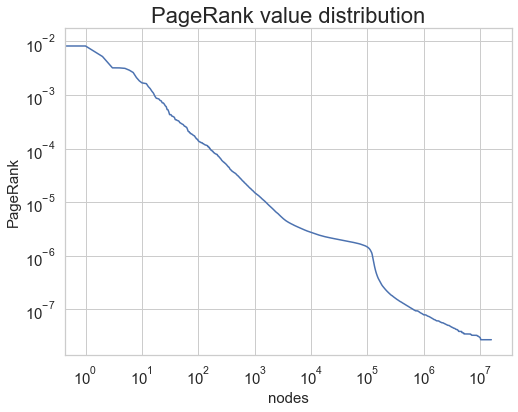

In [181]:
fig = plt.figure(figsize=(8,6))
plt.loglog(np.flip(np.sort(prs)))#, basey=base)
plt.ylabel('PageRank')
plt.xlabel('nodes')
plt.title('PageRank value distribution')
#    plt.show()

In [182]:
fig.savefig('pagerank.png')

#### HITS

In [115]:
hits_eig, g.vp['vertex_hubs'], g.vp['vertex_auth']=gtanalysis.compute_hits(g)

In [111]:
print(hits_eig)
print(len(hits_hubs.a))
print(len(hits_auth.a))

0.0013035561856603037
15776296
15776296


In [117]:
gtanalysis.get_topn_indices(g, 'vertex_hubs', 5)

1694786 /c/en/us 0.009454185632219574
1109870 /c/en/organic_compound 0.010279616827765724
977314 /c/en/mineral 0.014156979322257785
1452752 /c/en/slang 0.01146463013376105
1787274 mw:Noun 0.9990217959182452


In [119]:
gtanalysis.get_topn_indices(g, 'vertex_auth', 5)

1092606 /c/en/office/n 0.0013874502045317378
1198176 /c/en/pipe/n 0.0013897709252625415
562632 /c/en/finger/n 0.0014006496106346283
3082 /c/en/aa/n 0.001422256539421647
1214392 /c/en/point/n 0.0014190458155190144


## Querying

In [ ]:
import utils.gt.query_utils as gtquery

In [ ]:
from_deg=10000
to_deg=100000

In [ ]:
importlib.reload(gtquery)

In [ ]:
gv=gtquery.get_nodes_with_degree(g, from_deg, to_deg)

In [ ]:
gtanalysis.get_num_nodes(gv)

In [ ]:
p='datasource'
v='CN'
sq=gtquery.get_nodes_by_node_prop(g, p, v)

In [ ]:
len(sq)

In [ ]:
p1='predicate'
v1='/r/RelatedTo'
sq1=gtquery.get_edges_by_edge_prop(g, p1, v1)

In [ ]:
len(sq1)

In [ ]:
len(gtquery.get_neighbors(g, '/c/en/bird', 'total'))